In [ ]:
# Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Read and Display the data
# from PIL import Image

image_path = image_path = "D:\\lenna.png"
img = Image.open(image_path)

# Using PIL
# img.show()

# Using Matplotlib
plt.show(img)
plt.axis("off")
plt.show()


In [ ]:
# Display teh top left corner of 100x100 pixels

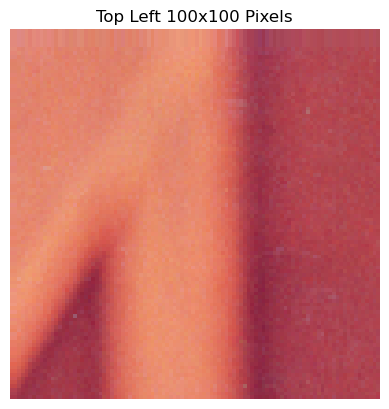

In [20]:
img_array = np.array(img)
top_left_corner = img_array[:100, :100]
top_left_img = Image.fromarray(top_left_corner)
plt.imshow(top_left_img)
plt.axis("off")
plt.title("Top Left 100x100 Pixels")
plt.show()

In [ ]:
# Show three color channels(R,G,B)

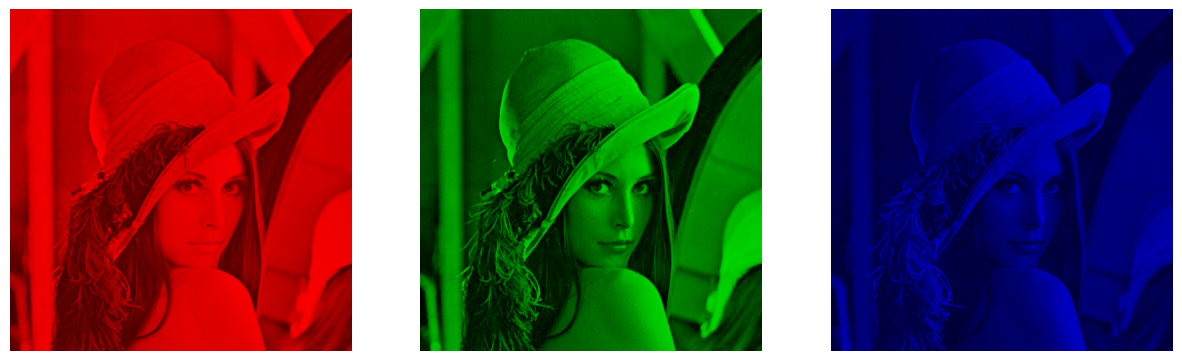

In [30]:
img_array = np.array(img)

red = img_array.copy()
green = img_array.copy()
blue = img_array.copy()

red[:, :, 1:]=0
green[:,:, [0,2]]= 0
blue[:, :, :2] =0

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(red)
axes[0].axis("off")

axes[1].imshow(green)
axes[1].axis("off")

axes[2].imshow(blue)
axes[2].axis("off")

plt.show()


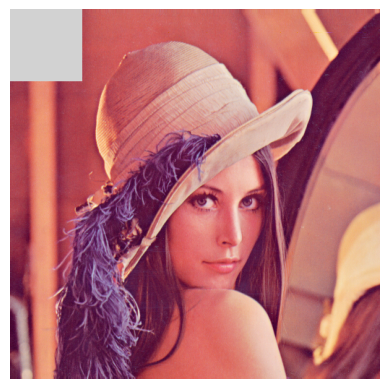

In [32]:
img_array =np.array(img)

img_array [:100, :100] =210

new_img = Image.fromarray(img_array)

plt.imshow(new_img)
plt.axis("off")
plt.show()

In [ ]:
# Exercise 2

In [ ]:
# 1. Load and Display the gray image

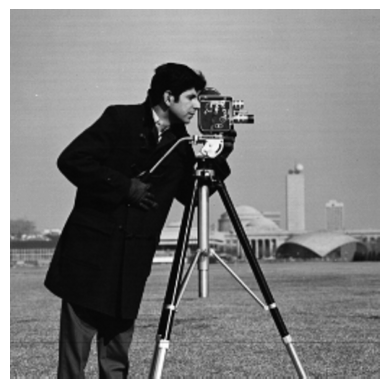

In [44]:
path_image = "D:\\cameraman.png"
img = Image.open(path_image).convert("L")
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
# Extract and display the middle section of the image

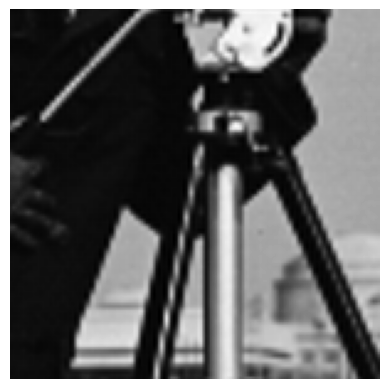

In [48]:
img_array = np.array(img)

height, width = img_array.shape

start_x = (width-150) // 2
end_x = start_x + 150
start_y = (height- 150) //2
end_y= start_y +150

middle = img_array[start_y: end_y, start_x: end_x]

plt.imshow(middle, cmap= "gray")
plt.axis("off")  
plt.show()

In [ ]:
# Apply threshold to the image

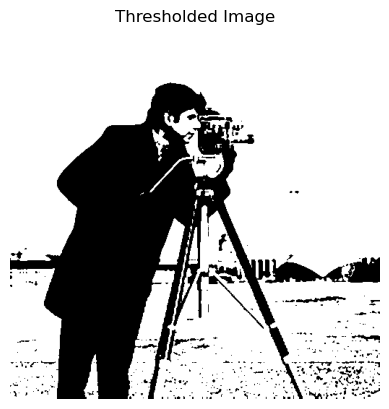

In [54]:
img = Image.open(path_image).convert("L")

image_array = np.array(img)

# Apply threshold: set pixels <100 to 0 and ≥100 to 255
threshold_value = 100
binary_image = np.where(img_array < threshold_value, 0,255)

new_image = Image.fromarray(binary_image)

plt.imshow(new_image, cmap ="gray")
plt.axis("off") 
plt.title("Thresholded Image")
plt.show()

In [ ]:
# Rotate the image 90 degrees clockwise

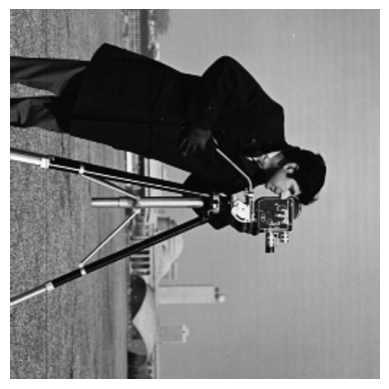

In [60]:
clockwise_rotated = img.rotate(-90, expand = True)
plt.imshow(clockwise_rotated, cmap= "gray")
plt.axis("off")
plt.show()

In [ ]:
# Convert grayscale into RGB

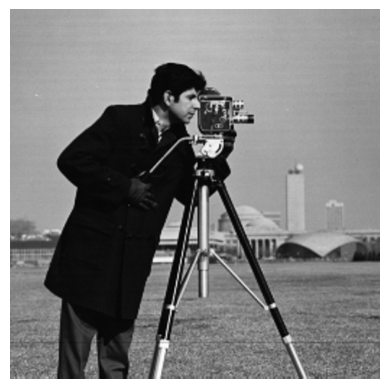

In [62]:
# Stack the grayscale image along the last dimension (R, G, B)
rgb_image = np.stack([img_array] * 3, axis= -1)

pil_rgb_img = Image.fromarray(rgb_image)

plt.imshow(pil_rgb_img)
plt.axis("off") 
plt.show()

In [ ]:
# Exercise3

In [ ]:
# 1. Load and Prepare Data:
# • Fetch an image of you choice.{If colour convert to grayscale}
# • Center the dataset - Standaridze the Data.
# • Calculate the covaraince matrix of the Standaridze data.

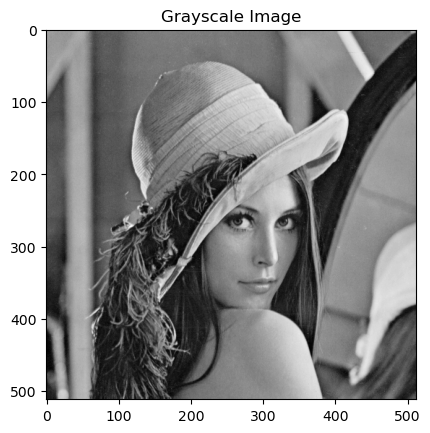

Covariance Matrix:
 [[ 0.67592652  0.67592652  0.65760065 ... -0.20345282 -0.19127163
  -0.17274404]
 [ 0.67592652  0.67592652  0.65760065 ... -0.20345282 -0.19127163
  -0.17274404]
 [ 0.65760065  0.65760065  0.65000039 ... -0.22661402 -0.2152941
  -0.19732349]
 ...
 [-0.20345282 -0.20345282 -0.22661402 ...  1.34629876  1.33745396
   1.32274375]
 [-0.19127163 -0.19127163 -0.2152941  ...  1.33745396  1.34136651
   1.33306917]
 [-0.17274404 -0.17274404 -0.19732349 ...  1.32274375  1.33306917
   1.33995127]]


In [68]:
image_path = image_path = "D:\\lenna.png"
img = Image.open(image_path)

gray_image = img.convert("L")

plt.imshow(gray_image, cmap ="gray")
plt.title('Grayscale Image')
plt.show()

image_array = np.array(gray_image)

# Standarize the data
mean = np.mean(image_array)
std_deviation = np.std(image_array)
standarize_data = (image_array - mean) / std_deviation

# Covariance matrix
cov_matrix = np.cov(standarize_data, rowvar = False)
print("Covariance Matrix:\n", cov_matrix)




In [ ]:
# 2. Eigen Decomposition and Identifying Principal Components:
# • Compute Eigen Values and Eigen Vectors.
# • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
# the highest eigenvalues.
# • Identify the Principal Components with the help of cumulative Sum plot.

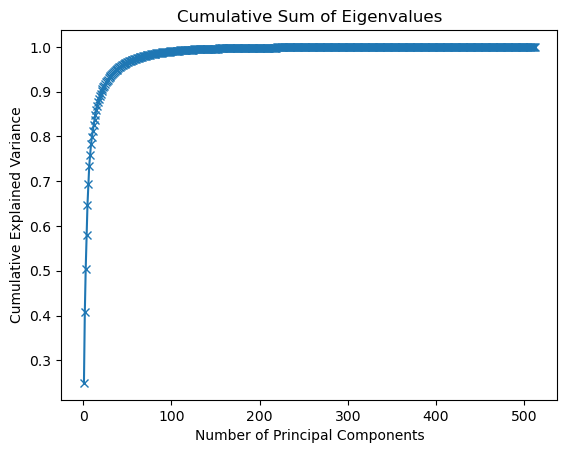

In [72]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose top k eigenvectors
k = 7
top_k_eigenvectors = sorted_eigenvectors[:, :k]

cumulative_sum = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)

plt.plot(range(1, len(cumulative_sum) +1), cumulative_sum, marker = 'x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Sum of Eigenvalues')
plt.show()

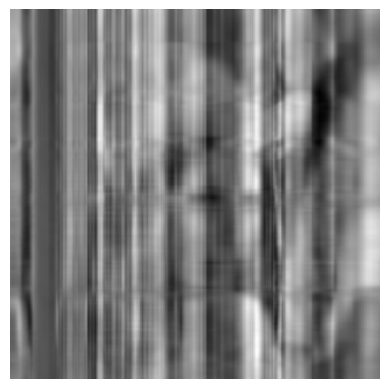

Reconstruction error with 10 principal components: 7566.282718387305


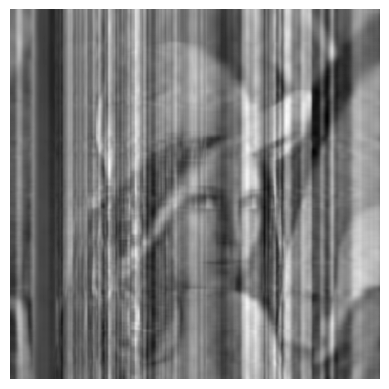

Reconstruction error with 20 principal components: 5146.161033699154


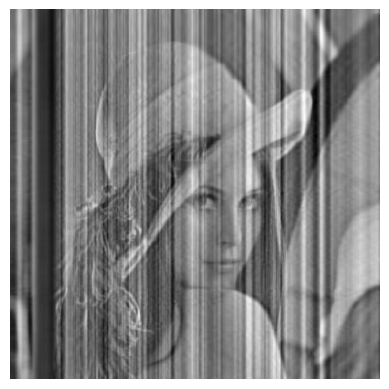

Reconstruction error with 50 principal components: 3284.451959533928


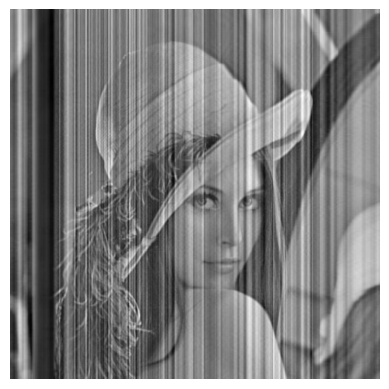

Reconstruction error with 100 principal components: 2663.112088100742


In [84]:
# gray image to top k eigenvectors
reduced_data = np.dot(image_array, top_k_eigenvectors)

k_values = [10, 20, 50, 100]

for k in k_values:
    top_k_eigenvectors = sorted_eigenvectors[:, :k]
    reduced_data = np.dot(image_array, top_k_eigenvectors)
    # Reconstructed image
    reconstructed_image = np.dot(reduced_data, top_k_eigenvectors.T)

    reconstructed_image = np.real(reconstructed_image)  # Fix complex numbers

    plt.imshow(reconstructed_image.reshape(image_array.shape), cmap="gray")
    # fix complex  numbers
    reconstructed_image = np.clip(reconstructed_image, 0, 255) 

    plt.axis('off')
    plt.show()
    reconstruction_error = np.mean((image_array - reconstructed_image) **2)
    print(f'Reconstruction error with {k} principal components: {reconstruction_error}')



